# NeuralProphet Modeling

In [1]:
## 필요한 모듈 호출 ##
try:
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.metrics import mean_squared_error
    import pandas as pd
    import numpy as np
    from neuralprophet import NeuralProphet
    import pickle
except ModuleError:
    !pip install matplotlib==3.2.1
    !pip install seaborn==0.12.1
    !pip install scikit-learn==1.1.1
    !pip install pandas==1.4.3
    !pip install numpy==1.22.4
    !pip install neuralprophet==0.4.2
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import mean_squared_error
    import pandas as pd
    import numpy as np
    from neuralprophet import NeuralProphet
    import pickle

## 민수용_외부변수(온도) 추론

In [2]:
## 냉난방도일 데이터 불러오기##
# 외부데이터파일('냉난방도일.csv') 사용 / 본 파일과 데이터파일이 같은 폴더에 위치한 후 실행가능
data = pd.read_csv('냉난방도일.csv')
data["ID"] = pd.date_range("1997-01-01", "2020-12-01", freq="MS")
df_temp = data[['ID', "난방도일 (도일)"]]

In [3]:
# 난방도일 - NeuralProphet 모델 생성
model = NeuralProphet(yearly_seasonality=True )
df_temp.rename(columns={'ID':'ds', '난방도일 (도일)':'y'}, inplace=True)

In [4]:
# 생성한 모델에 fitting
model.fit(df_temp)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.319% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 308


  0%|          | 0/114 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.63E-01, min: 3.40E-01


  0%|          | 0/114 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.36E-01, min: 2.83E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.30E-01
Epoch[308/308]: 100%|█| 308/308 [00:09<00:00, 31.77it/s, SmoothL1Loss=0.00146, MAE=23.2, RMSE=3


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.757373,1391.009949,1496.590637,1.339199,0.0
1,1.710029,1360.920702,1466.322042,1.301015,0.0
2,1.660370,1329.304830,1438.015544,1.261425,0.0
3,1.604062,1293.420756,1402.944207,1.216229,0.0
4,1.539581,1252.320757,1358.124457,1.164650,0.0
...,...,...,...,...,...
303,0.001460,23.185578,32.582397,0.001102,0.0
304,0.001461,23.191158,32.368982,0.001102,0.0
305,0.001459,23.183076,32.412287,0.001101,0.0
306,0.001459,23.181248,32.656052,0.001101,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.319% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.319% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


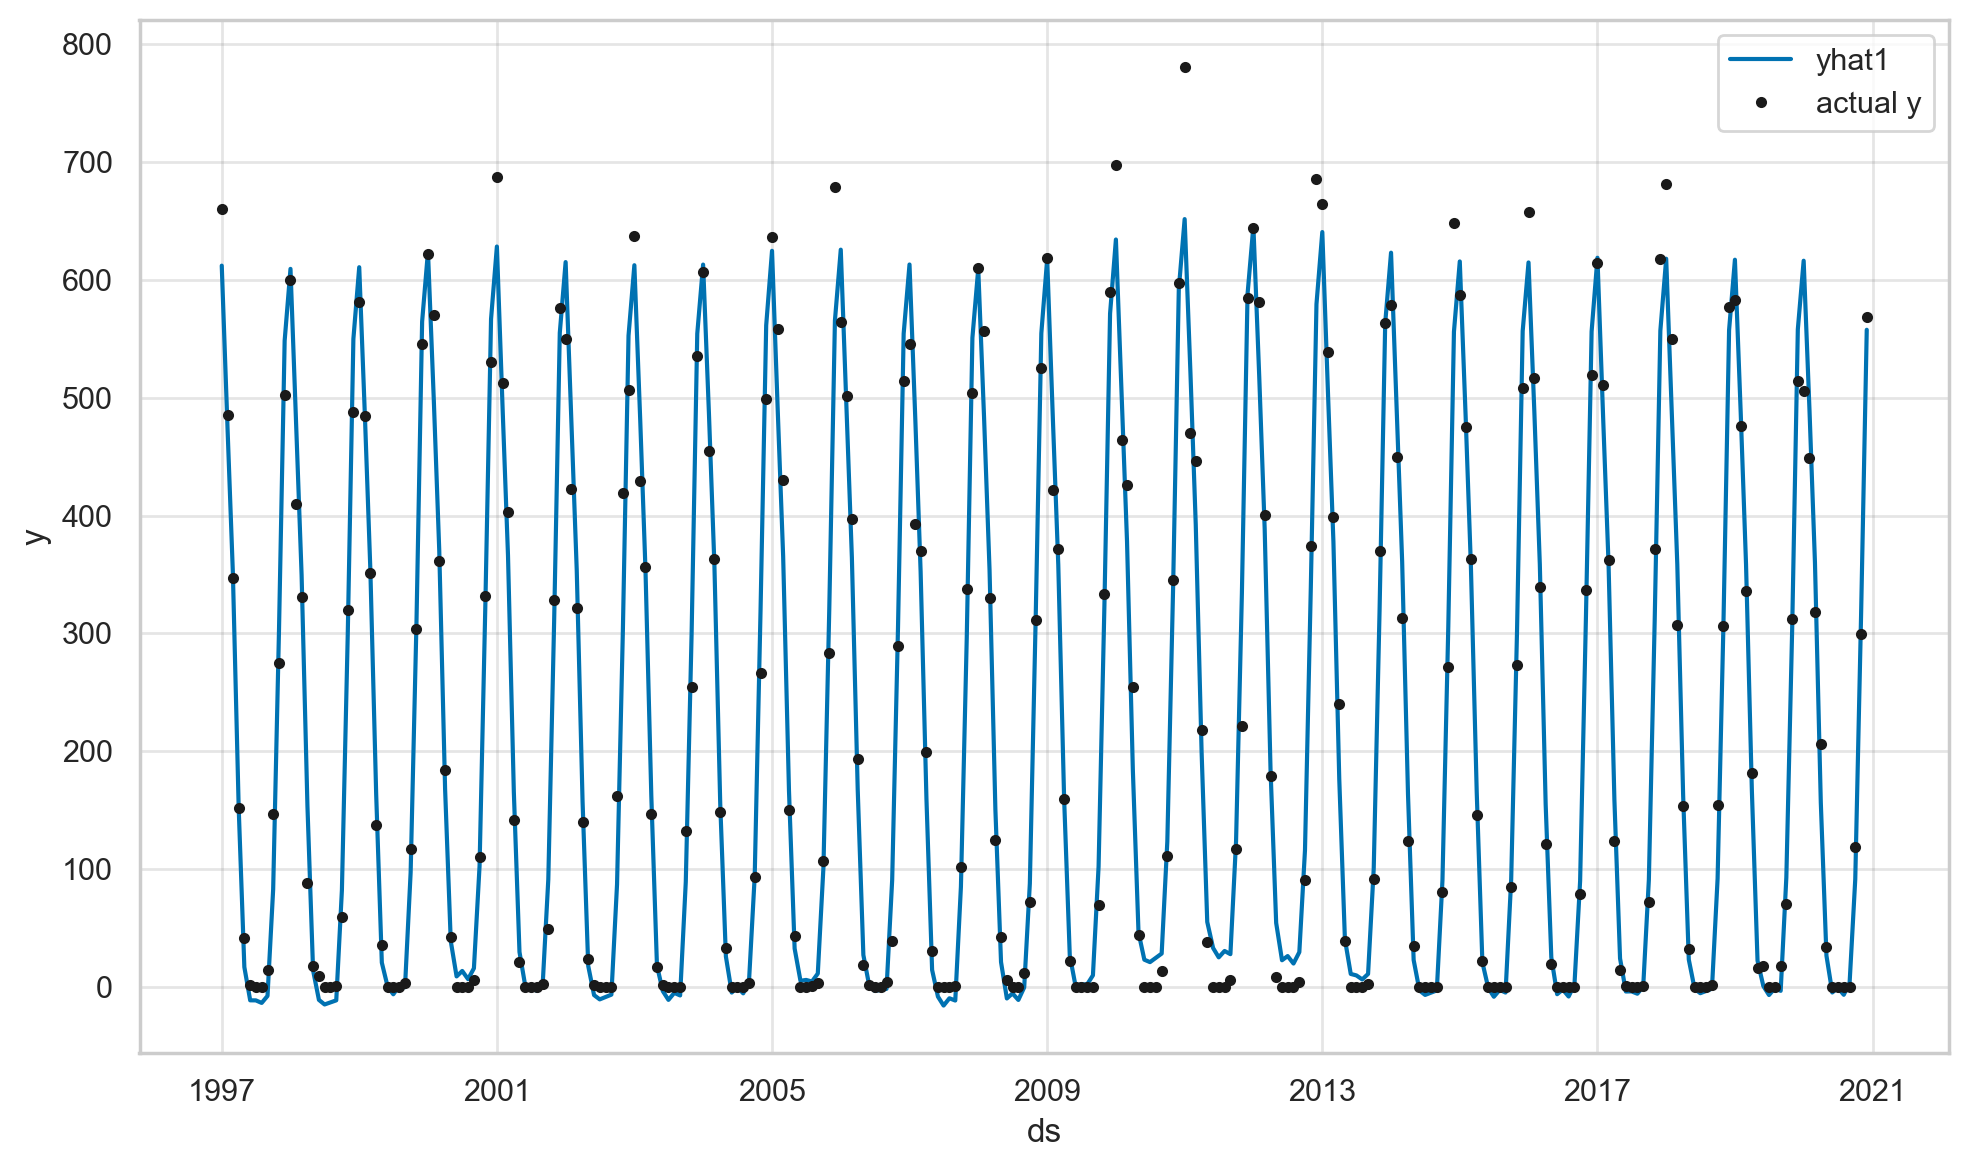

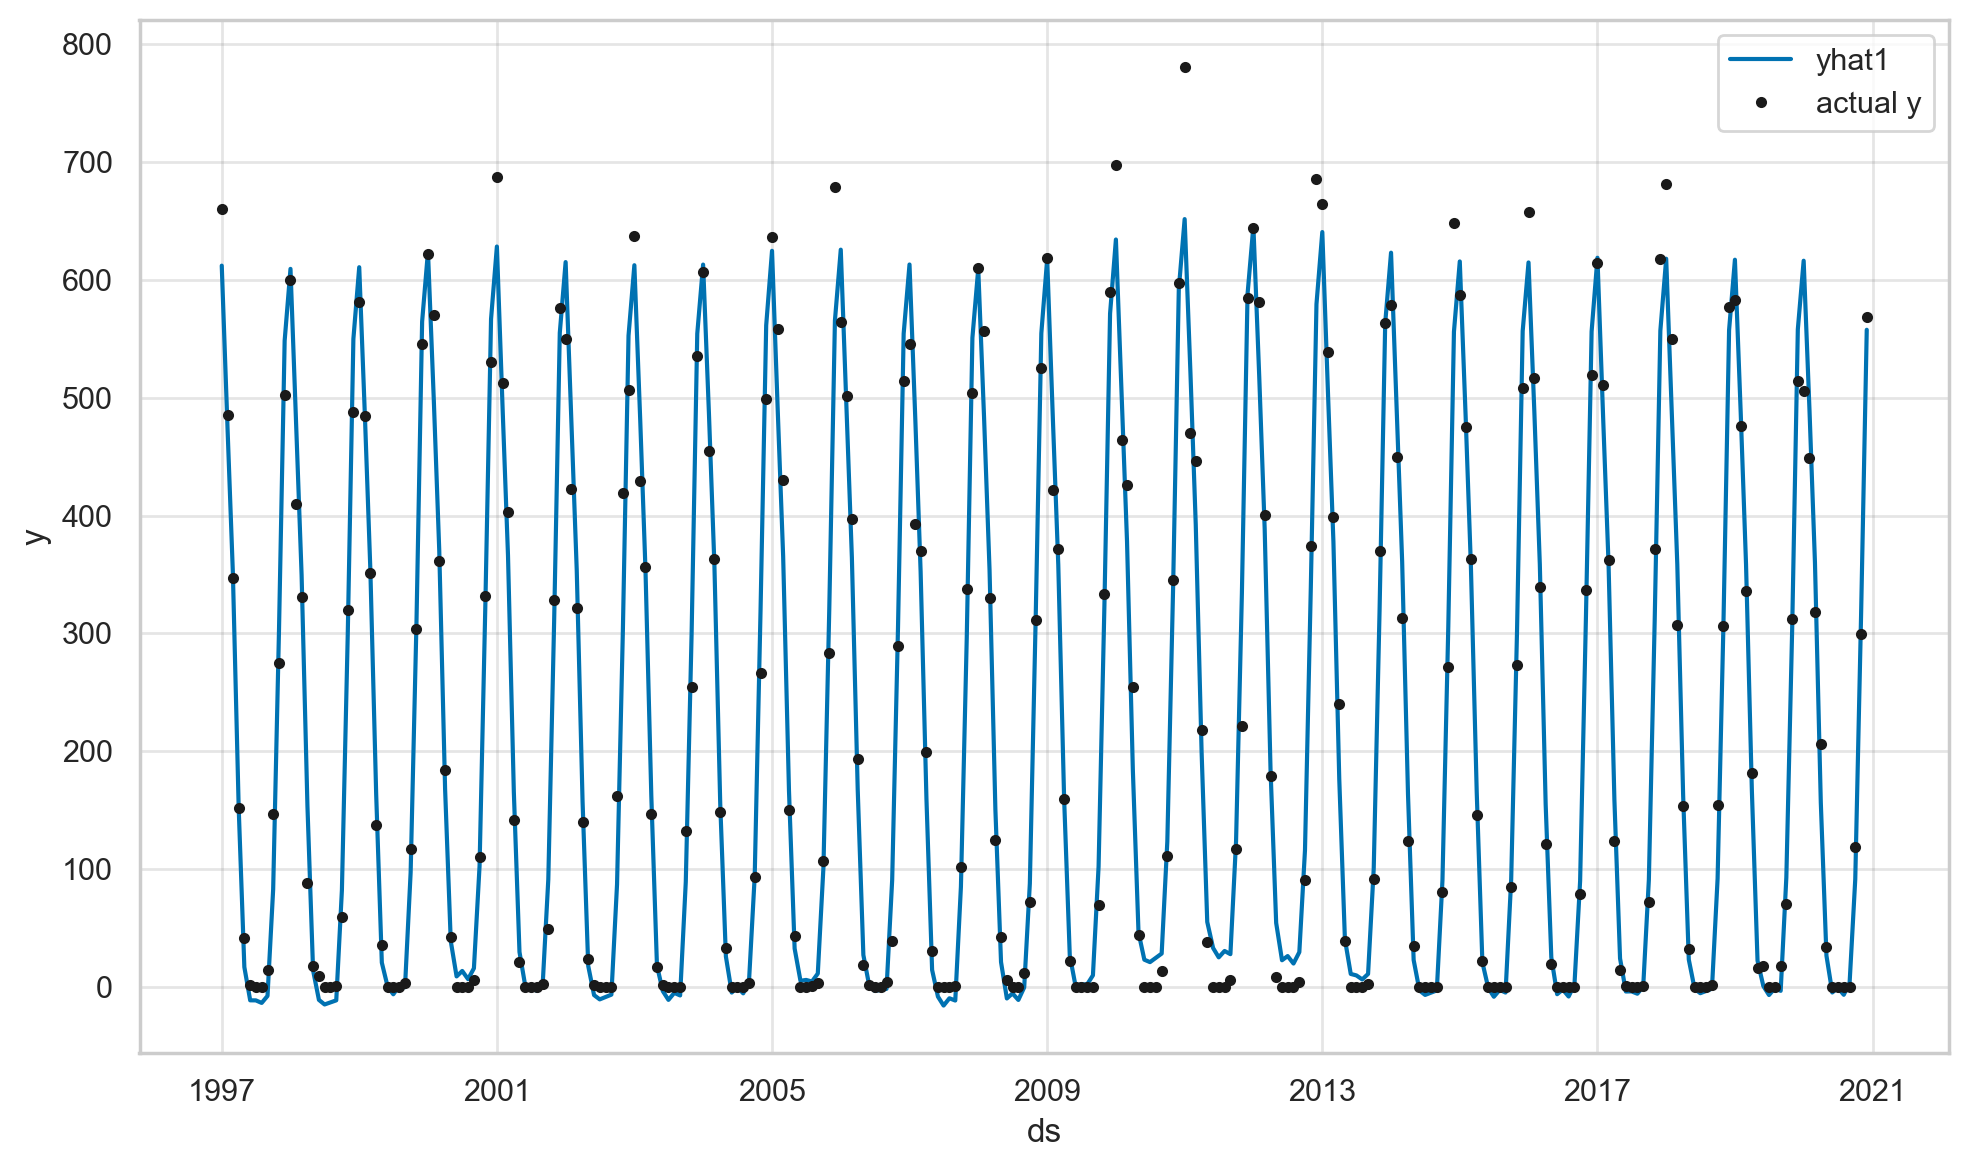

In [5]:
# y값 예측치와 실제값 그래프 확인
forecast = model.predict(df_temp)
model.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.319% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


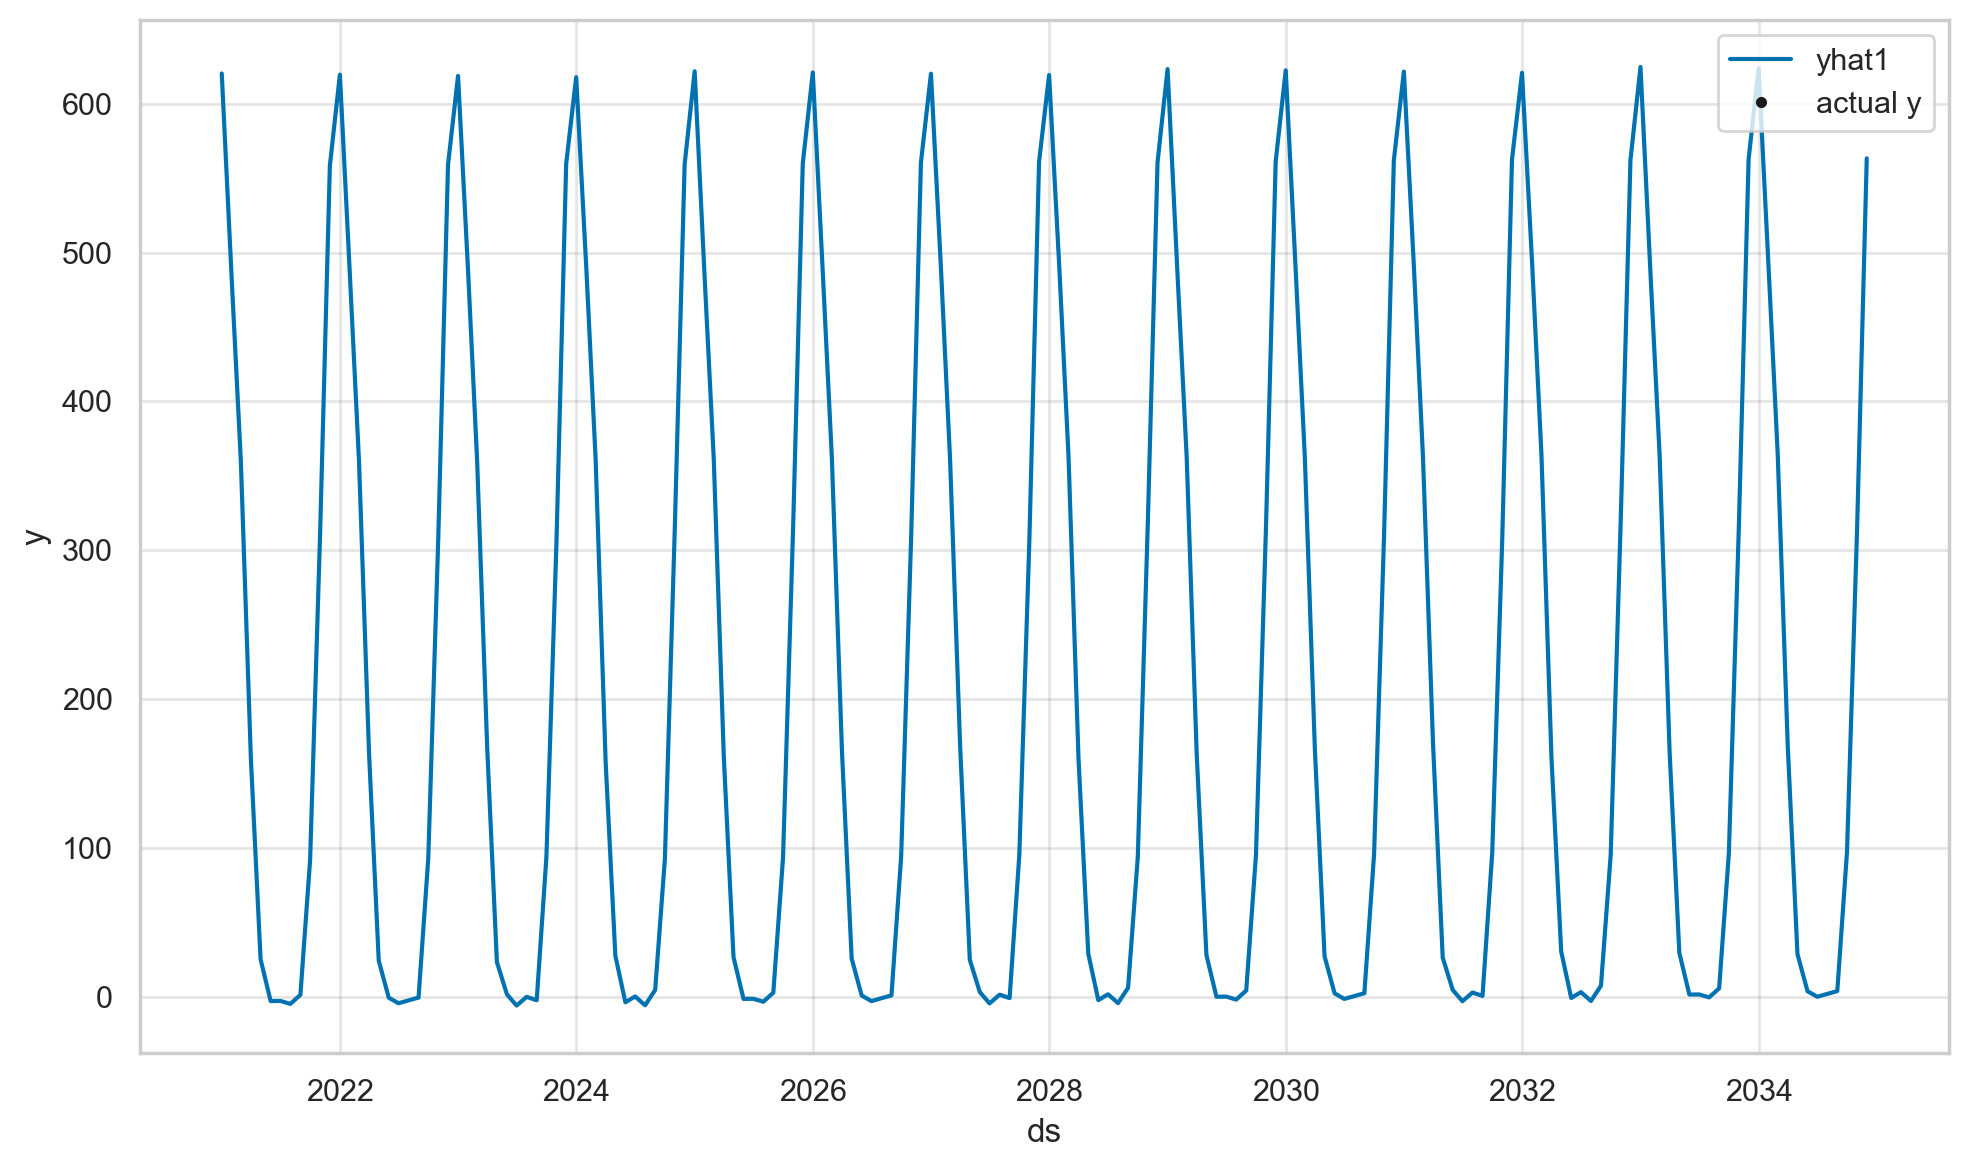

In [6]:
# 미래 14년치 예측을 위한 DataFrame 생성
future_temp = model.make_future_dataframe(df_temp, periods=12*14)
# 14년치 난방도일 예측값 확인
forecast2 = model.predict(future_temp)
forecasts_plot = model.plot(forecast2)

In [7]:
# 난방도일 예측치 저장
future_temp['y'] = forecast2['yhat1']

In [8]:
# 기존의 난방도일 Dataframe과 14년 예측치 병합
df_temp = pd.concat([df_temp,future_temp])
df_temp.rename(columns={'y':'temp'}, inplace=True)
df_temp

,ds,temp
0,1997-01-01,659.800000
1,1997-02-01,485.200000
2,1997-03-01,346.800000
3,1997-04-01,151.400000
4,1997-05-01,41.200000
...,...,...
163,2034-08-01,2.358139
164,2034-09-01,4.254066
165,2034-10-01,97.679710
166,2034-11-01,313.202728


In [9]:
# 난방도일 예측 학습모델 저장
with open('neuralprophet_temp_pred.pkl', "wb") as f:
    pickle.dump(model, f) 

## 민수용_수요 예측 모델 학습

In [10]:
## 민수용 데이터 불러오기 ##
# 제공된 데이터 파일(월별공급량및비중) 사용 / 본 파일과 데이터파일이 같은 폴더에 위치한 후 실행가능
data2 = pd.read_csv('월별공급량및비중.csv')
data2["ID"] = pd.date_range("1996-01-01", "2020-12-01", freq="MS")

# 외부변수로 활용한 난방도일 데이터가 1997년부터 존재하기에 1996년도 수요 데이터 삭제
idx_1996 = data2[data2['YEAR']<1997].index
data2 = data2.drop(idx_1996)

In [11]:
civil = data2[["ID", "도시가스(톤)_민수용"]]
civil

,ID,도시가스(톤)_민수용
12,1997-01-01,775522.0
13,1997-02-01,640683.0
14,1997-03-01,532435.0
15,1997-04-01,357484.0
16,1997-05-01,248334.0
...,...,...
295,2020-08-01,398661.0
296,2020-09-01,380235.0
297,2020-10-01,616682.0
298,2020-11-01,1093747.0


In [12]:
# 외부변수 temp(난방도일)를 생성하기 위해 df_temp와 병합
civil.rename(columns={'ID':'ds', '도시가스(톤)_민수용':'y'}, inplace=True)

civil = pd.merge(left=civil, right=df_temp, how="inner", on="ds")

In [13]:
# NeuralProphet 모델 생성
m = NeuralProphet(yearly_seasonality=True,
                  seasonality_mode = 'multiplicative',
                  num_hidden_layers=4,
                  d_hidden=16,
                  learning_rate=0.05)

In [14]:
# 외부변수 temp 추가
m.add_future_regressor('temp', normalize='auto')

In [15]:
# 생성한 모델에 fitting
m.fit(civil)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.319% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 308
Epoch[308/308]: 100%|█| 308/308 [00:12<00:00, 25.06it/s, SmoothL1Loss=0.000245, MAE=2.69e+4, RM


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,0.194670,834961.477431,1.065866e+06,0.174228,0.0
1,0.180360,801674.062500,1.012949e+06,0.161754,0.0
2,0.164947,766405.690972,9.696281e+05,0.148210,0.0
3,0.149956,730114.005208,9.267784e+05,0.135151,0.0
4,0.133011,688031.826389,8.702103e+05,0.120137,0.0
...,...,...,...,...,...
303,0.000246,26917.141168,3.590294e+04,0.000189,0.0
304,0.000245,26901.023763,3.687037e+04,0.000188,0.0
305,0.000245,26901.936198,3.647379e+04,0.000188,0.0
306,0.000245,26902.492188,3.643215e+04,0.000188,0.0


In [16]:
# 민수용 수요 예측 학습모델 저장
with open('neuralprophet_civil_pred.pkl', "wb") as f:
    pickle.dump(m, f)

# KOSPI 예측

<AxesSubplot:>

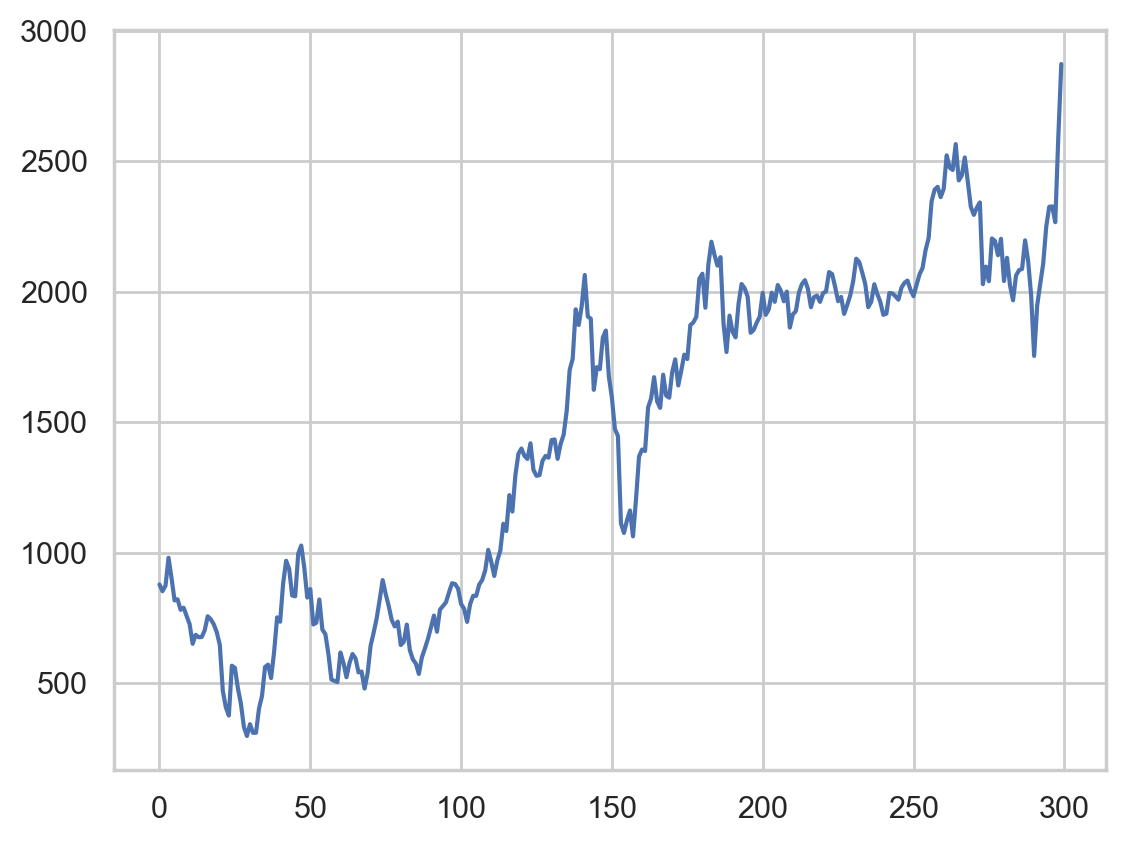

In [17]:
## KOSPI 데이터 불러오기##
# 외부데이터파일('코스피지수.csv') 사용 / 본 파일과 데이터파일이 같은 폴더에 위치한 후 실행가능
data3 = pd.read_csv('코스피지수.csv')
data3["ID"] = pd.date_range("1996-01-01", "2020-12-01", freq="MS")
df_kospi = data3[['ID', "종가"]]
df_kospi['종가'].plot()

In [18]:
# KOSPI - NeuralProphet 모델 생성
model_kospi = NeuralProphet(yearly_seasonality=False)
df_kospi.rename(columns={'ID':'ds', '종가':'y'}, inplace=True)

In [19]:
# 생성한 모델에 fitting
model_kospi.fit(df_kospi)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 302


  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.44E-01, min: 2.80E+01


  0%|          | 0/115 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.44E-01, min: 2.98E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.27E-01
Epoch[302/302]: 100%|█| 302/302 [00:11<00:00, 26.41it/s, SmoothL1Loss=0.00316, MAE=122, RMSE=15


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.989677,5092.398542,5110.144531,1.524681,0.0
1,1.940242,4991.284095,5006.845404,1.484920,0.0
2,1.887242,4882.877578,4897.485898,1.442483,0.0
3,1.826747,4759.141061,4771.714212,1.394049,0.0
4,1.756972,4616.423496,4627.593040,1.338497,0.0
...,...,...,...,...,...
297,0.003163,122.177612,159.285024,0.002482,0.0
298,0.003163,122.175220,158.258431,0.002482,0.0
299,0.003163,122.166773,159.271953,0.002482,0.0
300,0.003163,122.162119,160.958660,0.002482,0.0


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


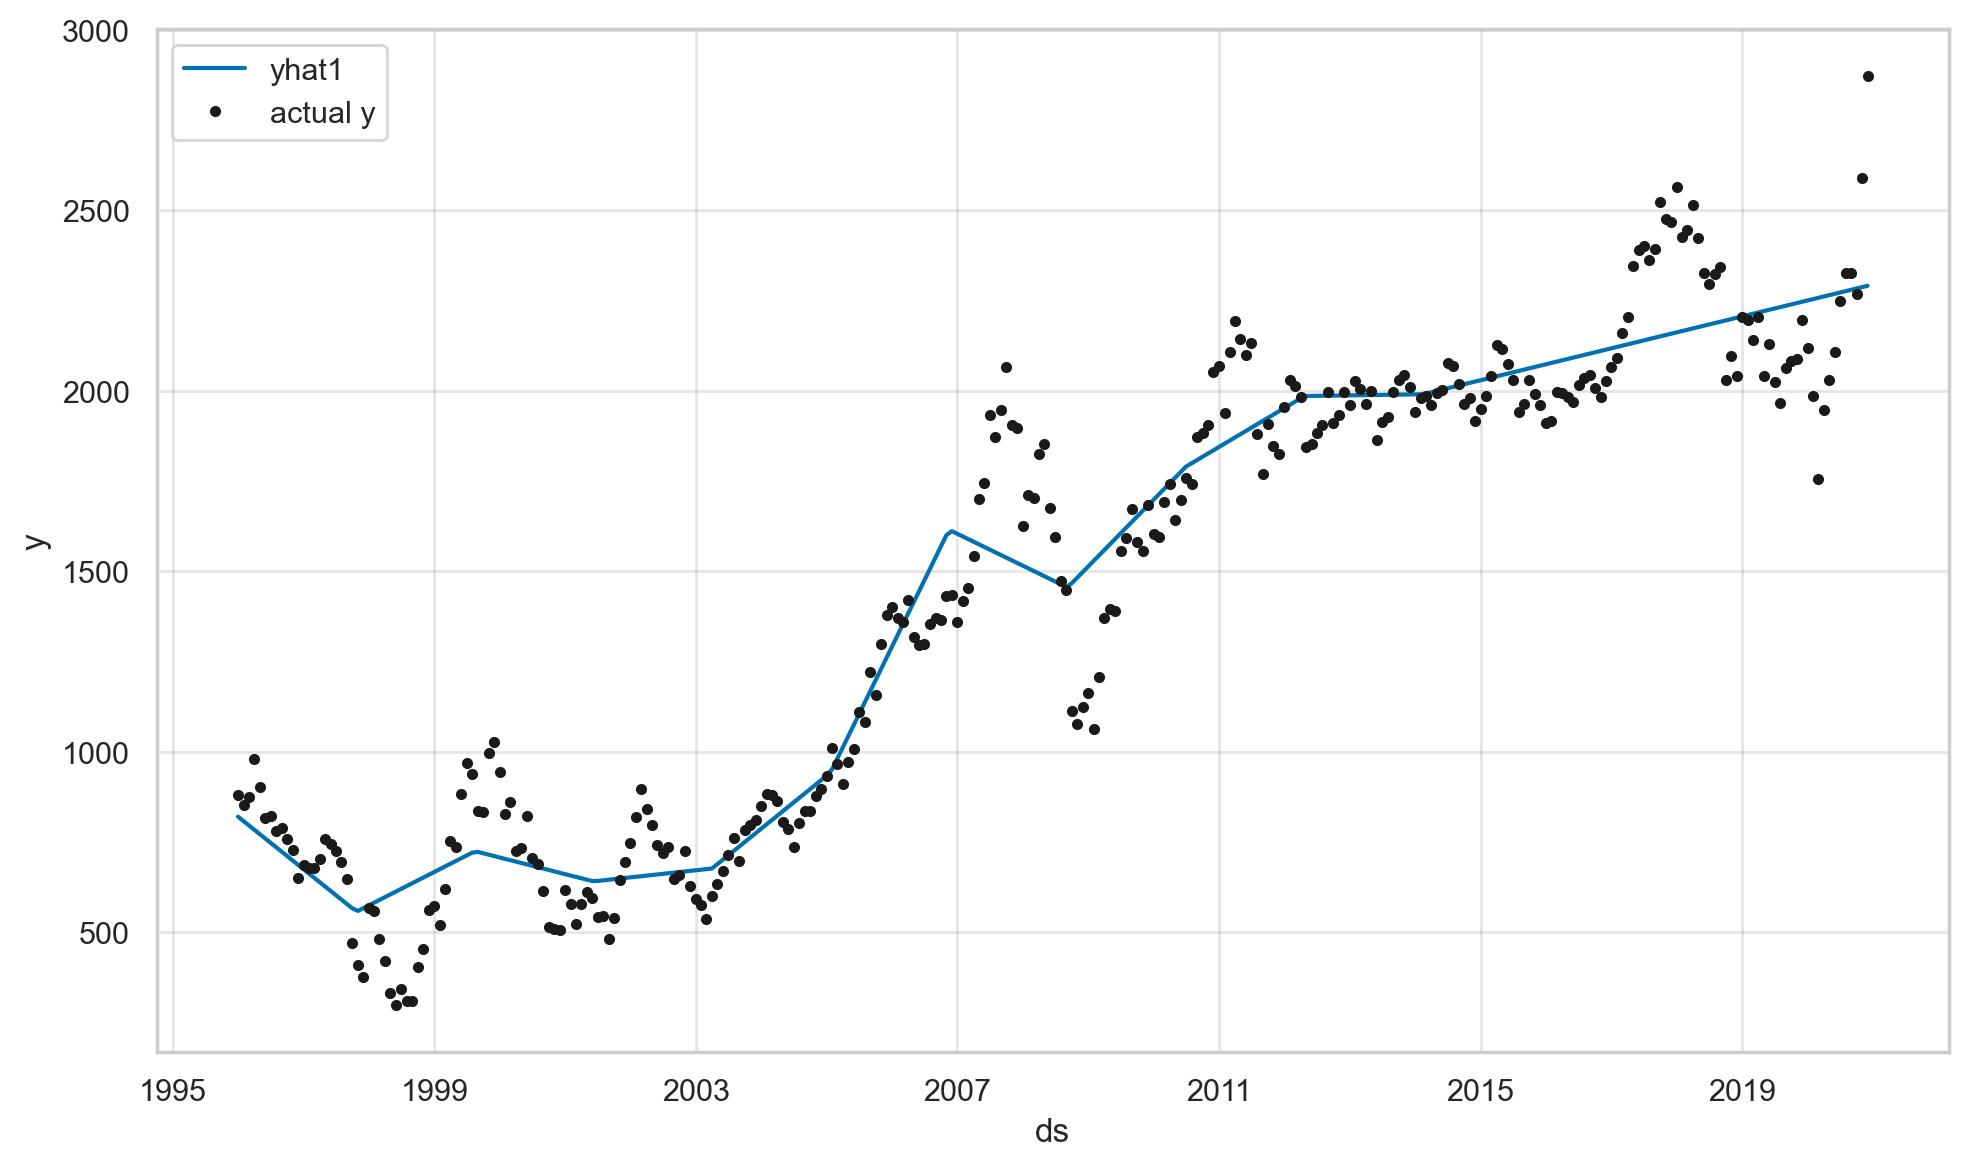

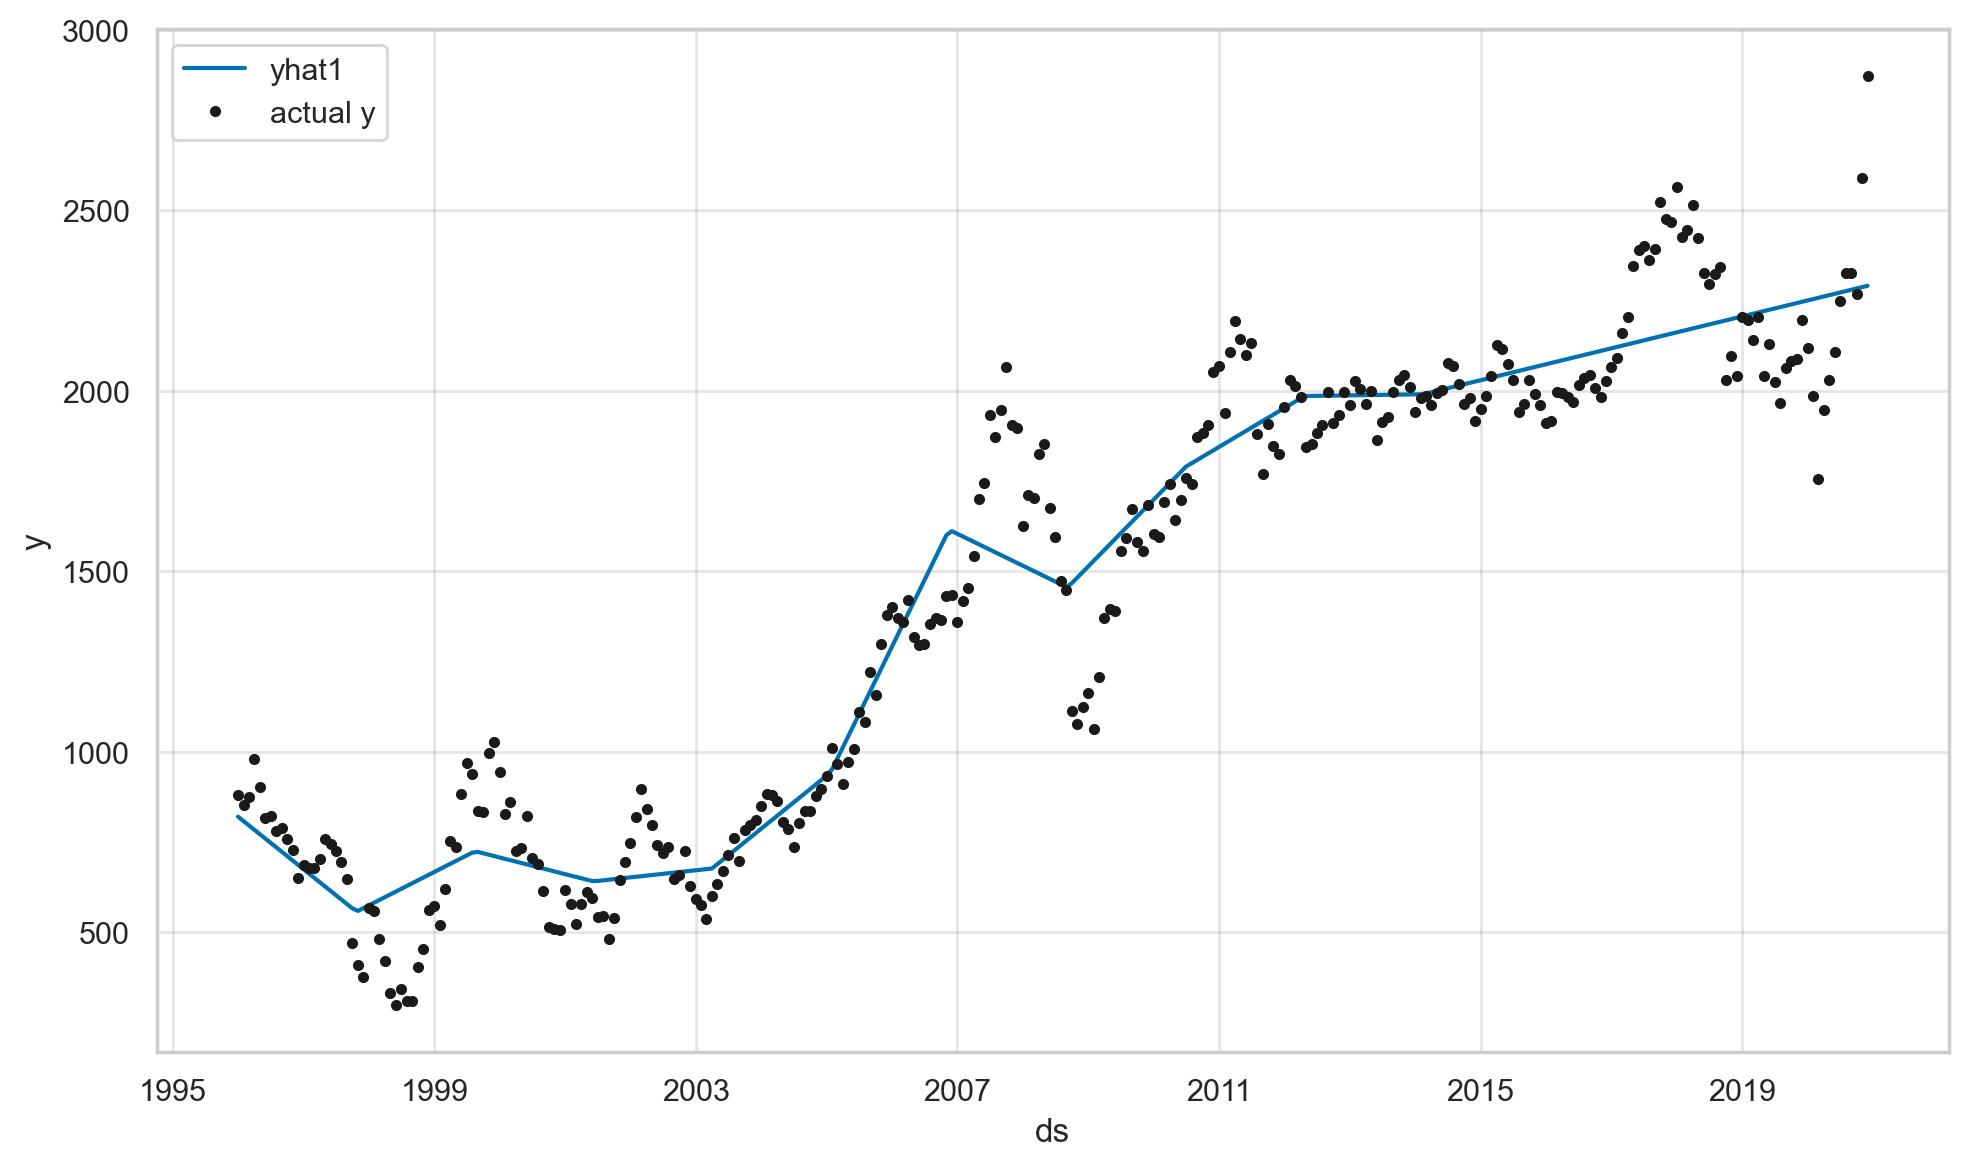

In [20]:
# y값 예측치와 실제값 그래프 확인
forecast_kos = model_kospi.predict(df_kospi)
model_kospi.plot(forecast_kos)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.071% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


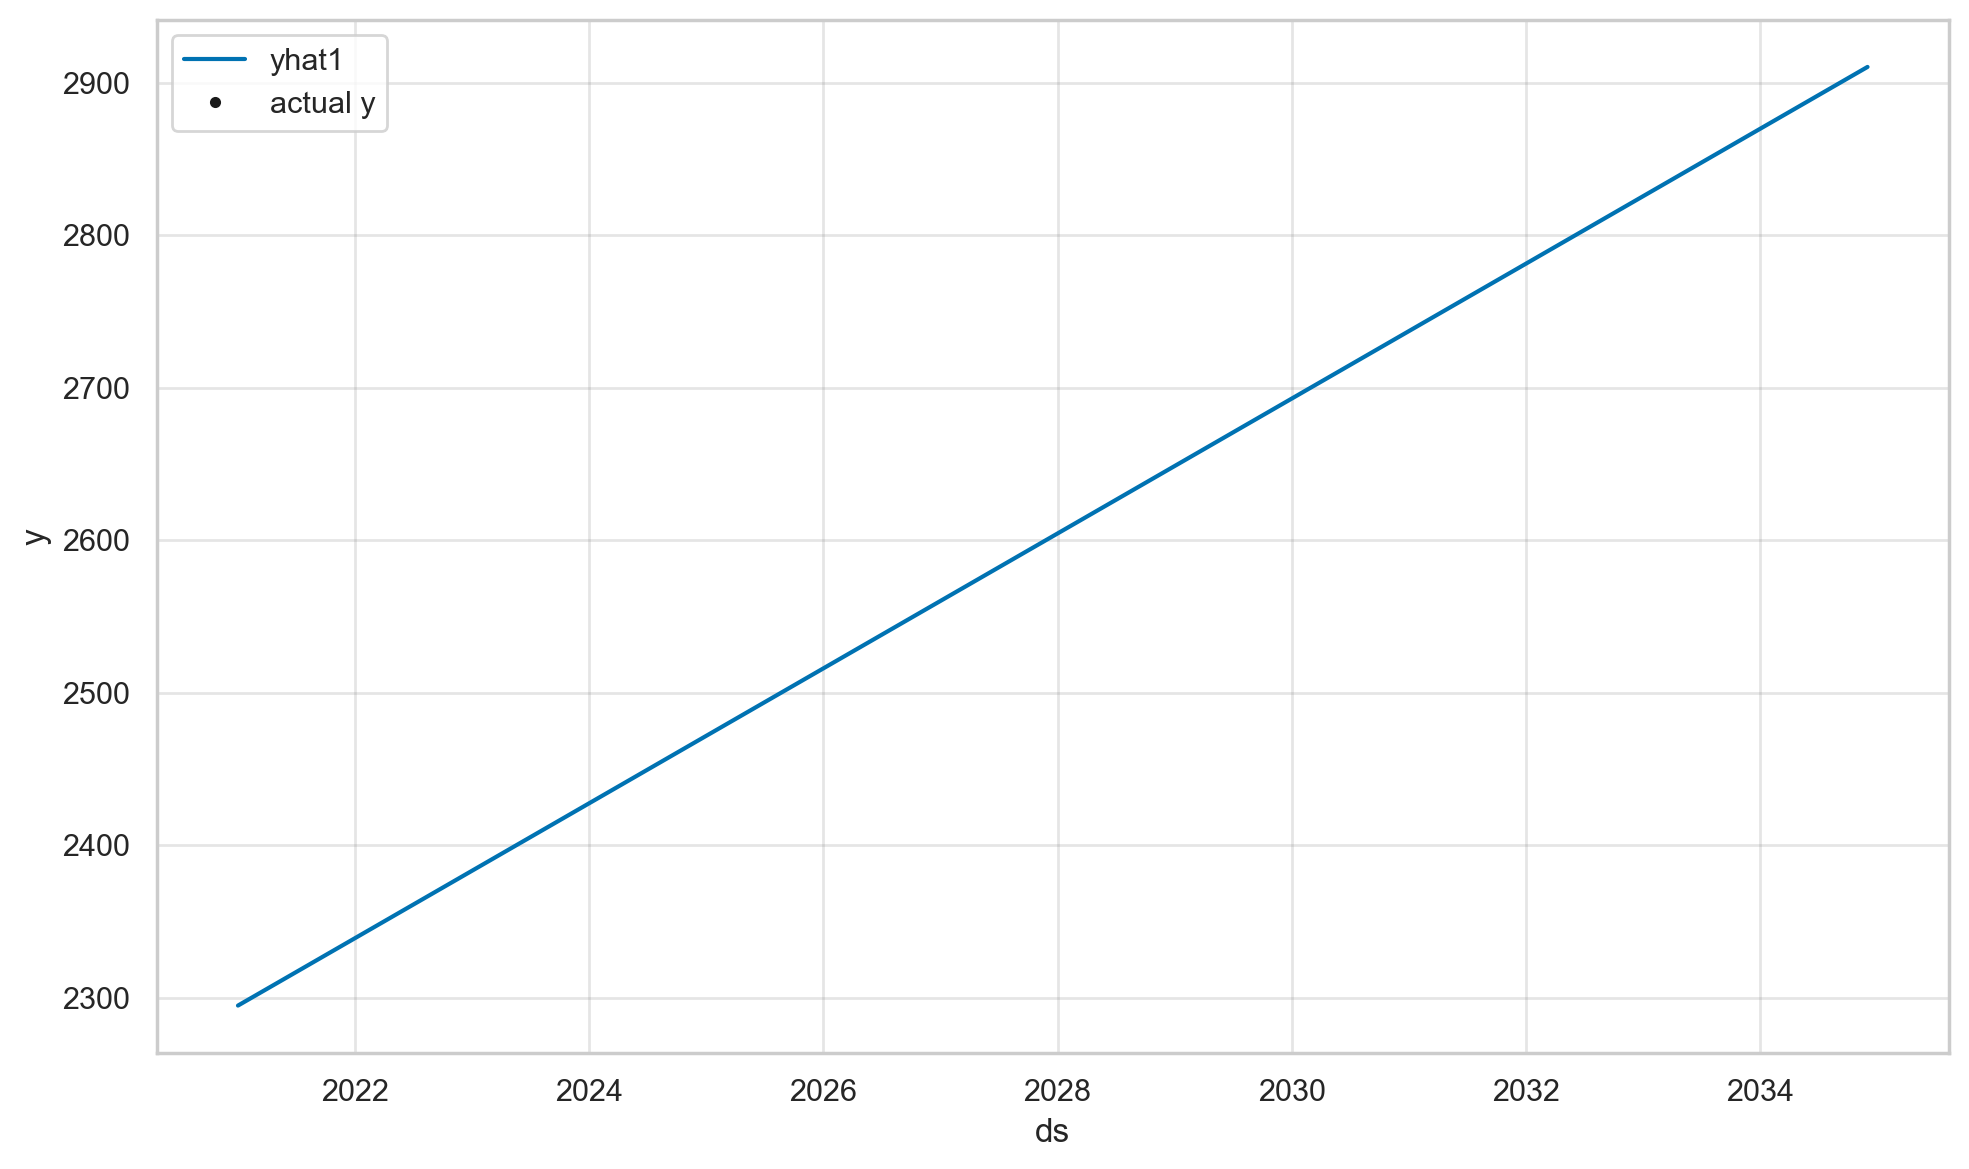

In [21]:
# 미래 14년치 예측을 위한 DataFrame 생성
future_kospi = model_kospi.make_future_dataframe(df_kospi, periods=12*14)
# 14년치 KOSPI 예측값 확인
forecast2_kos = model_kospi.predict(future_kospi)
forecasts_plot = model_kospi.plot(forecast2_kos)

In [22]:
# KOSPI 예측치 저장
future_kospi['y'] = forecast2_kos['yhat1']

In [23]:
# 기존의 KOSPI Dataframe과 14년 예측치 병합
df_kospi = pd.concat([df_kospi,future_kospi])
df_kospi.rename(columns={'y':'kospi'}, inplace=True)
df_kospi

,ds,kospi
0,1996-01-01,878.820000
1,1996-02-01,852.830000
2,1996-03-01,874.160000
3,1996-04-01,980.900000
4,1996-05-01,903.090000
...,...,...
163,2034-08-01,2895.528809
164,2034-09-01,2899.282227
165,2034-10-01,2902.915039
166,2034-11-01,2906.668457


In [24]:
# KOSPI 예측 학습모델 저장
with open('neuralprophet_kospi_pred.pkl', "wb") as f:
    pickle.dump(model_kospi, f) 

# 산업용 예측

In [25]:
## 산업용 데이터 불러오기 ##
# 제공된 데이터 파일(월별공급량및비중) 사용 / 본 파일과 데이터파일이 같은 폴더에 위치한 후 실행가능
data2 = pd.read_csv('월별공급량및비중.csv')
data2["ID"] = pd.date_range("1996-01-01", "2020-12-01", freq="MS")

In [26]:
ind = data2[["ID", "도시가스(톤)_산업용"]]
ind

,ID,도시가스(톤)_산업용
0,1996-01-01,83809.0
1,1996-02-01,70427.0
2,1996-03-01,62652.0
3,1996-04-01,47050.0
4,1996-05-01,30709.0
...,...,...
295,2020-08-01,457970.0
296,2020-09-01,525619.0
297,2020-10-01,600890.0
298,2020-11-01,665901.0


In [27]:
# 외부변수 kospi(KOSPI)를 생성하기 위해 df_kospi와 병합
ind.rename(columns={'ID':'ds', '도시가스(톤)_산업용':'y'}, inplace=True)

ind = pd.merge(left=ind, right=df_kospi, how="inner", on="ds")
ind

,ds,y,kospi
0,1996-01-01,83809.0,878.82
1,1996-02-01,70427.0,852.83
2,1996-03-01,62652.0,874.16
3,1996-04-01,47050.0,980.90
4,1996-05-01,30709.0,903.09
...,...,...,...
295,2020-08-01,457970.0,2326.17
296,2020-09-01,525619.0,2327.89
297,2020-10-01,600890.0,2267.15
298,2020-11-01,665901.0,2591.34


In [28]:
# NeuralProphet 모델 생성
m_ind = NeuralProphet(yearly_seasonality=True,
                      num_hidden_layers=4,
                      d_hidden=16,
                      learning_rate=0.05)

In [29]:
# 외부변수 kospi 추가
m_ind.add_future_regressor('kospi', normalize='auto')

In [30]:
# 생성한 모델에 fitting
m_ind.fit(ind)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 91.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 302
Epoch[302/302]: 100%|█| 302/302 [00:16<00:00, 18.06it/s, SmoothL1Loss=0.00168, MAE=3.45e+4, RMS


,SmoothL1Loss,MAE,RMSE,Loss,RegLoss
0,1.999698,1.847039e+06,2.048337e+06,1.632733,0.0
1,1.975346,1.828521e+06,2.029562e+06,1.612893,0.0
2,1.949368,1.808691e+06,2.003933e+06,1.591610,0.0
3,1.920170,1.786432e+06,1.981787e+06,1.567793,0.0
4,1.885605,1.760056e+06,1.949589e+06,1.539354,0.0
...,...,...,...,...,...
297,0.001684,3.455945e+04,4.267147e+04,0.001338,0.0
298,0.001683,3.455091e+04,4.282812e+04,0.001338,0.0
299,0.001683,3.454845e+04,4.254720e+04,0.001337,0.0
300,0.001683,3.454782e+04,4.247721e+04,0.001337,0.0


In [31]:
# 산업용 수요 예측 학습모델 저장
with open('neuralprophet_ind_pred.pkl', "wb") as f:
    pickle.dump(m_ind, f)